<a href="https://colab.research.google.com/github/BenjaminDKLuong/Colab_Notes/blob/master/AR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load modules
from __future__ import print_function
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa

In [0]:
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None

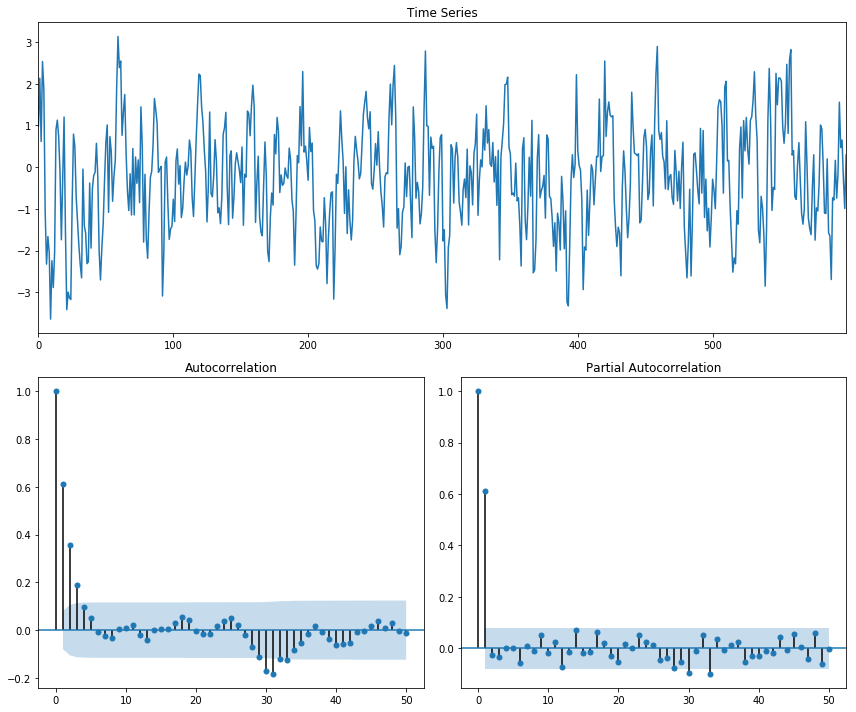

In [3]:
# Number of samples
n = 600

# Generate AR(1) dataset
ar = np.r_[1, -0.6]
ma = np.r_[1, 0]
ar1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)


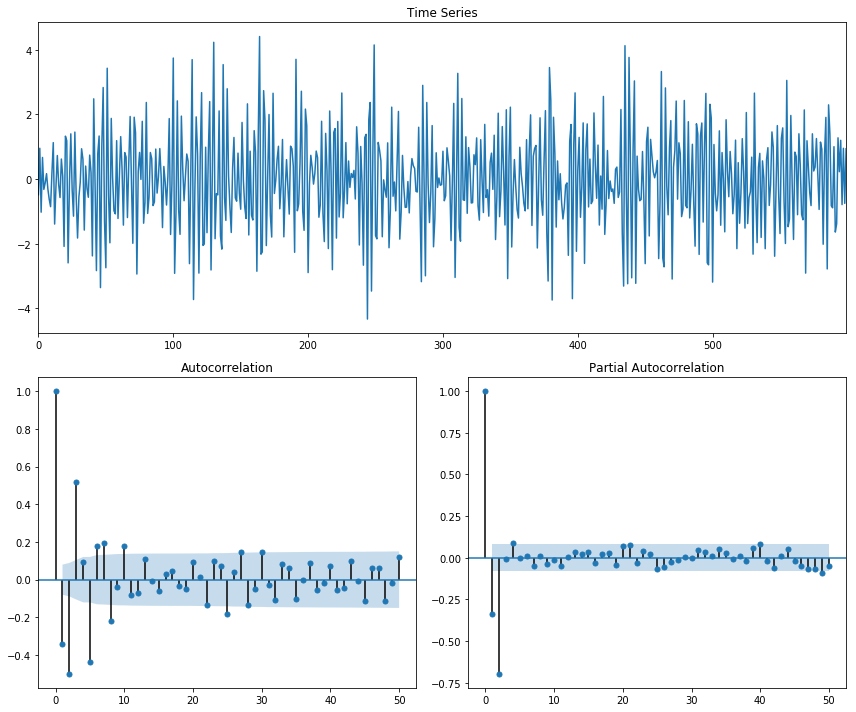

In [4]:
# Generate AR(2) dataset
ar = np.r_[1, 0.6, 0.7]
ma = np.r_[1, 0]
ar2_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar2_data)

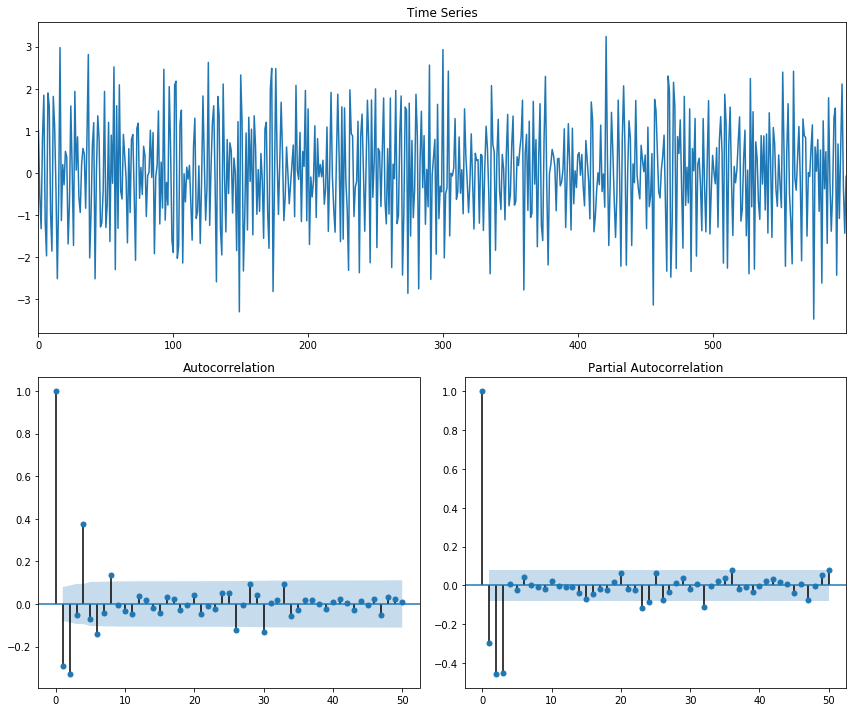

In [5]:
# Generate AR(3) dataset
ar = np.r_[1, 0.6, 0.7, 0.5]
ma = np.r_[1, 0]
ar3_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar3_data)

In [6]:
# Build AR(1) model
ar1model = smtsa.ARMA(ar1_data.tolist(), order=(1, 0))
ar1=ar1model.fit(maxlag=30, method='mle', trend='nc')
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 0)   Log Likelihood                -847.666
Method:                           mle   S.D. of innovations              0.993
Date:                Sat, 27 Apr 2019   AIC                           1699.333
Time:                        06:05:53   BIC                           1708.127
Sample:                             0   HQIC                          1702.756
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.6266      0.032     19.737      0.000       0.564       0.689
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5958           +0.0000j            1.5958            0.0000
-----------------------------------------------------------------------------
"""

In [7]:
# Build MA(3) model
ar3 = smtsa.ARMA(ar3_data.tolist(), order=(3, 0)).fit(
    maxlag=30, method='mle', trend='nc')
ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(3, 0)   Log Likelihood                -818.420
Method:                           mle   S.D. of innovations              0.946
Date:                Sat, 27 Apr 2019   AIC                           1644.840
Time:                        06:06:03   BIC                           1662.427
Sample:                             0   HQIC                          1651.686
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.6282      0.037    -17.210      0.000      -0.700      -0.557
ar.L2.y       -0.6438      0.036    -17.853      0.000      -0.714      -0.573
ar.L3.y       -0.4472      0.036    -12.254      0.000      -0.519      -0.376
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0293           -1.2214j            1.2217           -0.2462
AR.2            0.0293           +1.2214j            1.2217            0.2462
AR.3           -1.4982           -0.0000j            1.4982           -0.5000
-----------------------------------------------------------------------------
"""